__Purpose:__ Implement Per-FedAvg (MAML)
> Observed results: global model diverges, personalized cost is fixed at zero... my algorithm must be written incorrectly.  

In [1]:
import pandas as pd
import os
import numpy as np
import random
from matplotlib import pyplot as plt
from scipy.optimize import minimize
import copy

from experiment_params import *
from cost_funcs import *
from fl_sim_classes import *
import time
import pickle
from sklearn.decomposition import PCA

In [2]:
path = r'C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Data'
cond0_filename = r'\cond0_dict_list.p'
all_decs_init_filename = r'\all_decs_init.p'
nofl_decs_filename = r'\nofl_decs.p'
id2color = {0:'lightcoral', 1:'maroon', 2:'chocolate', 3:'darkorange', 4:'gold', 5:'olive', 6:'olivedrab', 
            7:'lawngreen', 8:'aquamarine', 9:'deepskyblue', 10:'steelblue', 11:'violet', 12:'darkorchid', 13:'deeppink'}
num_participants = 14

with open(path+cond0_filename, 'rb') as fp:
    cond0_training_and_labels_lst = pickle.load(fp)
    
with open(path+all_decs_init_filename, 'rb') as fp:
    init_decoders = pickle.load(fp)
cond0_init_decs = [dec[0, :, :] for dec in init_decoders]

D_0_7 = np.random.rand(2,7)

# Federated Learning: FedAvgSB
## First Order (FO) Approximation, 500 Iterations
> Note that the thicker, lighter lines are the global model accuracies, whereas the thin lines are the local accuracies.

Client 1: New update after lrt passed: (new update, current global round, current local round): (11, 0, 25)

Client 1: New update after lrt passed: (new update, current global round, current local round): (12, 0, 50)



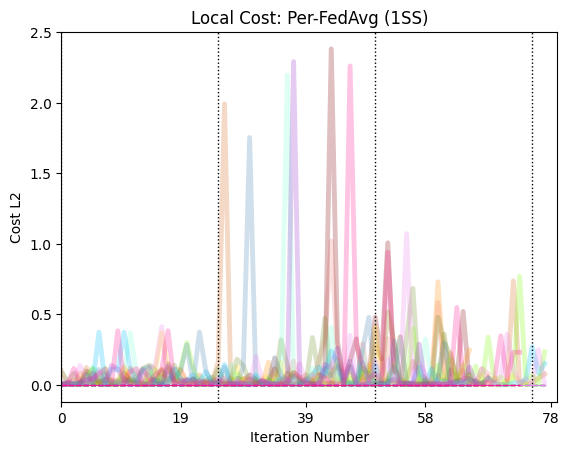

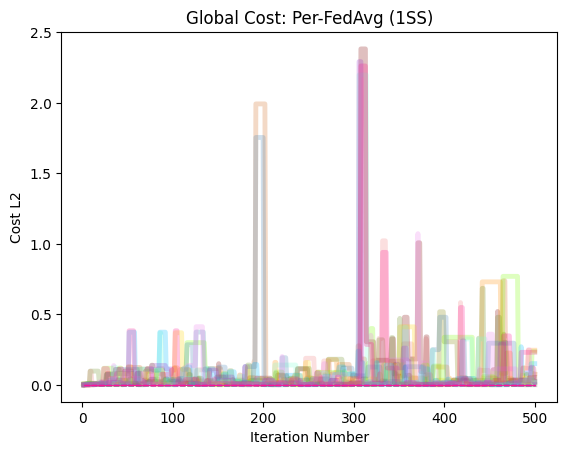

In [9]:
user_c0_1ScipyStep = [Client(i, D_0_7, 'Per-FedAvg FO', cond0_training_and_labels_lst[i], 'streaming', num_steps=5, delay_scaling=0, verbose=True) for i in range(14)]
global_model_1scipystep = Server(1, D_0_7, 'Per-FedAvg FO', user_c0_1ScipyStep)

big_loop_iters = 500
for i in range(big_loop_iters):
    global_model_1scipystep.execute_FL_loop()

condensed_external_plotting(user_c0_1ScipyStep, 'local', pers_error=True, custom_title='Local Cost: Per-FedAvg (1SS)')
condensed_external_plotting(global_model_1scipystep, 'global', pers_error=True, show_update_change=False, custom_title='Global Cost: Per-FedAvg (1SS)')

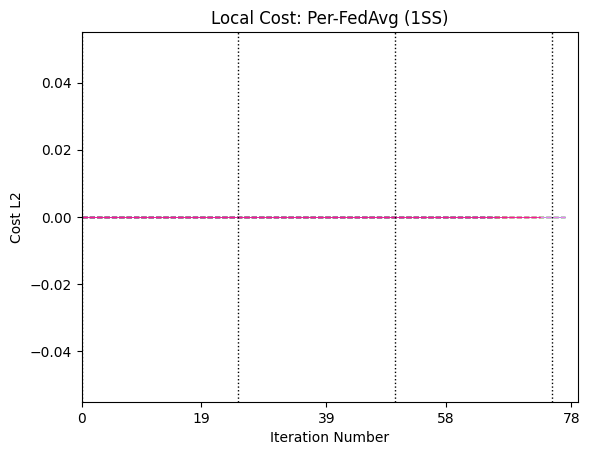

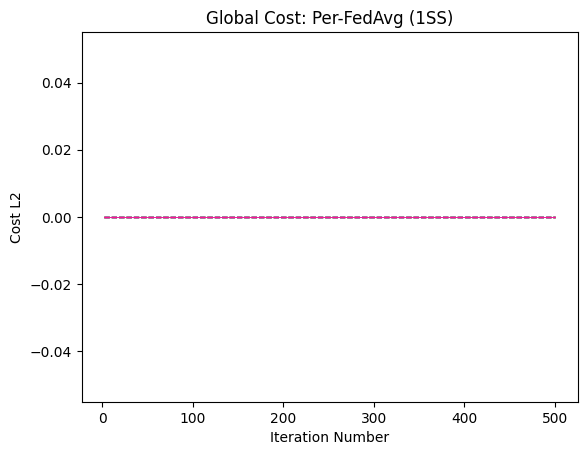

In [10]:
condensed_external_plotting(user_c0_1ScipyStep, 'local', global_error=False, pers_error=True, custom_title='Local Cost: Per-FedAvg (1SS)')
condensed_external_plotting(global_model_1scipystep, 'global', global_error=False, pers_error=True, show_update_change=False, custom_title='Global Cost: Per-FedAvg (1SS)')

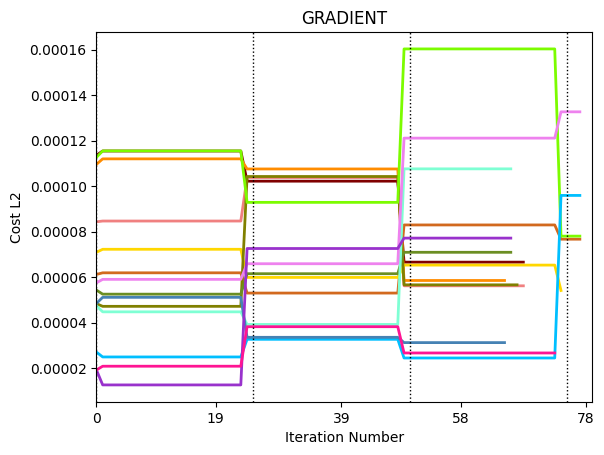

In [11]:
condensed_external_plotting(user_c0_1ScipyStep, 'local', plot_gradient=True, local_error=False, global_error=False, custom_title='GRADIENT')

## Hessian-vector product estimation (HF)

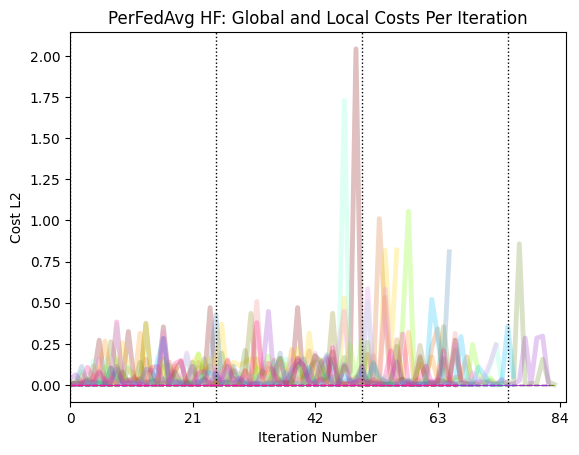

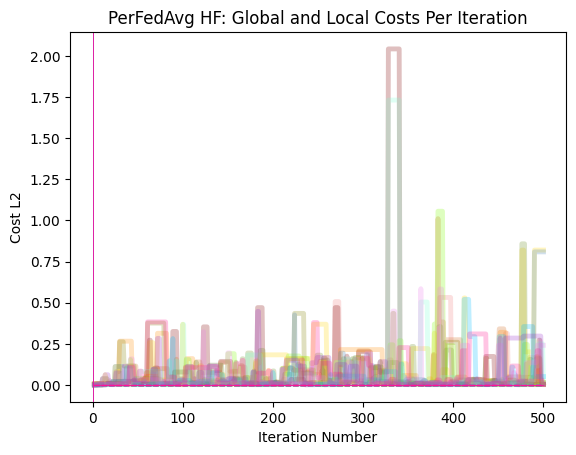

In [12]:
user_c0_10scipy = [Client(i, D_0_7, 'Per-FedAvg HF', cond0_training_and_labels_lst[i], 'streaming', num_steps=5, delay_scaling=0) for i in range(14)]
global_model_10scipy = Server(2, D_0_7, 'Per-FedAvg HF', user_c0_10scipy)

for i in range(big_loop_iters):
    global_model_10scipy.execute_FL_loop()
    
condensed_external_plotting(user_c0_10scipy, 'local', pers_error=True, custom_title='PerFedAvg HF: Global and Local Costs Per Iteration')
condensed_external_plotting(global_model_10scipy, 'global', pers_error=True, custom_title='PerFedAvg HF: Global and Local Costs Per Iteration')

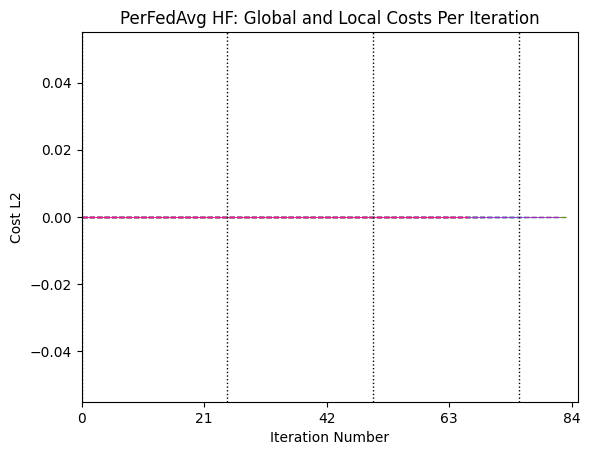

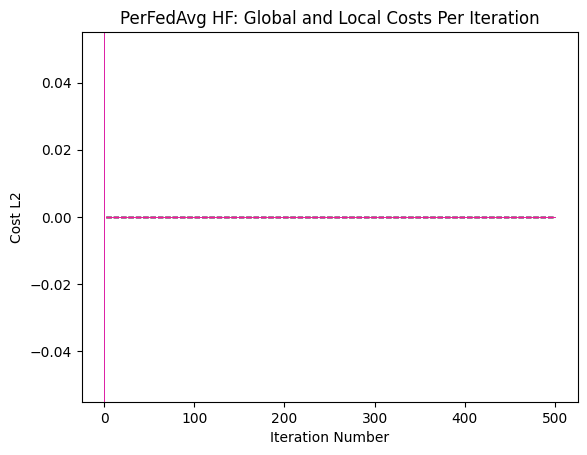

In [13]:
condensed_external_plotting(user_c0_10scipy, 'local', global_error=False, pers_error=True, custom_title='PerFedAvg HF: Global and Local Costs Per Iteration')
condensed_external_plotting(global_model_10scipy, 'global', global_error=False, pers_error=True, custom_title='PerFedAvg HF: Global and Local Costs Per Iteration')